In [22]:
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv(
    r"C:\Users\sandh\Desktop\dataset\Manufacturing Time cycle project\Manufacturing_Time_Cycle.csv"
)

df


,Batch_ID,Start_Timestamp,End_Timestamp,Cycle_Time_Hours
0,B001,01-01-2024 08:00,01-01-2024 12:10,4.17
1,B002,01-01-2024 08:30,01-01-2024 12:45,4.25
2,B003,01-01-2024 09:00,01-01-2024 13:00,4.00
3,B004,01-01-2024 09:30,01-01-2024 14:10,4.67
4,B005,01-01-2024 10:00,01-01-2024 14:00,4.00
5,B006,01-01-2024 10:30,01-01-2024 15:20,4.83
6,B007,01-01-2024 11:00,01-01-2024 15:00,4.00
7,B008,01-01-2024 11:30,01-01-2024 16:10,4.67
8,B009,01-01-2024 12:00,01-01-2024 16:00,4.00
9,B010,01-01-2024 12:30,01-01-2024 17:15,4.75


In [26]:
df.head()

,Batch_ID,Start_Timestamp,End_Timestamp,Cycle_Time_Hours
0,B001,01-01-2024 08:00,01-01-2024 12:10,4.17
1,B002,01-01-2024 08:30,01-01-2024 12:45,4.25
2,B003,01-01-2024 09:00,01-01-2024 13:00,4.00
3,B004,01-01-2024 09:30,01-01-2024 14:10,4.67
4,B005,01-01-2024 10:00,01-01-2024 14:00,4.00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Batch_ID               25 non-null     object 
 1   Start_Timestamp        25 non-null     object 
 2           End_Timestamp  25 non-null     object 
 3   Cycle_Time_Hours       25 non-null     float64
dtypes: float64(1), object(3)
memory usage: 928.0+ bytes


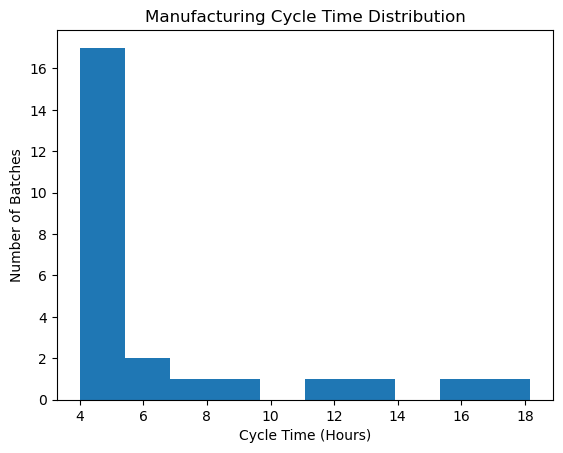

In [32]:
#VISULAIZE CYCLE TIME DISTRIBUTION

plt.hist(df['Cycle_Time_Hours'], bins=10)
plt.xlabel('Cycle Time (Hours)')
plt.ylabel('Number of Batches')
plt.title('Manufacturing Cycle Time Distribution')
plt.show()


In [33]:
#Identify Outliers Using IQR Method
Q1 = df['Cycle_Time_Hours'].quantile(0.25)
Q3 = df['Cycle_Time_Hours'].quantile(0.75)
IQR = Q3 - Q1


In [34]:
upper_limit = Q3 + 1.5 * IQR


In [35]:
outliers = df[df['Cycle_Time_Hours'] > upper_limit]
outliers


,Batch_ID,Start_Timestamp,End_Timestamp,Cycle_Time_Hours
21,B022,2024-01-04 13:30:00,05-01-2024 00:40,11.17
22,B023,2024-01-05 14:00:00,06-01-2024 03:30,13.50
23,B024,2024-01-06 14:30:00,07-01-2024 06:20,15.83
24,B025,2024-01-07 15:00:00,08-01-2024 09:10,18.17


In [36]:
outliers[['Batch_ID', 'Cycle_Time_Hours']]


,Batch_ID,Cycle_Time_Hours
21,B022,11.17
22,B023,13.50
23,B024,15.83
24,B025,18.17


In [37]:
df.to_csv("manufacturing_cycle_time_analyzed.csv", index=False)


## Business Recommendations



In [ ]:
1. Investigate Machine Downtime in Outlier Batches
Batches identified as outliers using the IQR method show significantly higher cycle times than normal. These batches should be analyzed to check for machine breakdowns, maintenance delays, or rework issues that may have caused production slowdowns.

2. Improve Production Scheduling for Long-Running Batches
Some batches consistently take longer to complete, which may indicate inefficient scheduling or resource allocation. Optimizing shift planning and balancing workloads across machines can help reduce extended cycle times.

3. Track Cycle Time as a Key Performance Indicator (KPI)
Cycle time should be monitored regularly as a core manufacturing KPI. Setting threshold limits and tracking trends over time can help detect bottlenecks early and prevent delays before they impact production targets.
